In [1]:
from legal_eval.data import download_data, get_hf_dataset, parse_to_ner, cast_ner_labels_to_int
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

DATA_PATH = Path("../data")

%load_ext autoreload
%autoreload 2

download_data(DATA_PATH)
dataset = get_hf_dataset(DATA_PATH)
dataset_ner = parse_to_ner(dataset)
dataset_casted = cast_ner_labels_to_int(dataset_ner)


Found cached dataset json (D:/hf_datasets/json/default-9acc4922681c4d90/0.0.0/fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e)


  0%|          | 0/1 [00:00<?, ?it/s]

Found cached dataset json (D:/hf_datasets/json/default-8e94a40253265d68/0.0.0/fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at D:\hf_datasets\json\default-9acc4922681c4d90\0.0.0\fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e\cache-145ac9fa7a6304a8.arrow
Loading cached processed dataset at D:\hf_datasets\json\default-8e94a40253265d68\0.0.0\fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e\cache-ce9751ed476fc978.arrow
Loading cached processed dataset at D:\hf_datasets\json\default-9acc4922681c4d90\0.0.0\fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e\cache-8e2deb16e36998fe.arrow
Loading cached processed dataset at D:\hf_datasets\json\default-8e94a40253265d68\0.0.0\fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e\cache-c3d9bf958cdab6ce.arrow


Casting the dataset:   0%|          | 0/10995 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/1074 [00:00<?, ? examples/s]

Lets see imbalances first

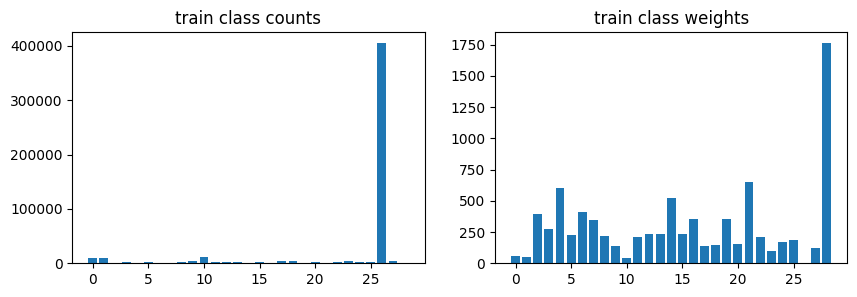

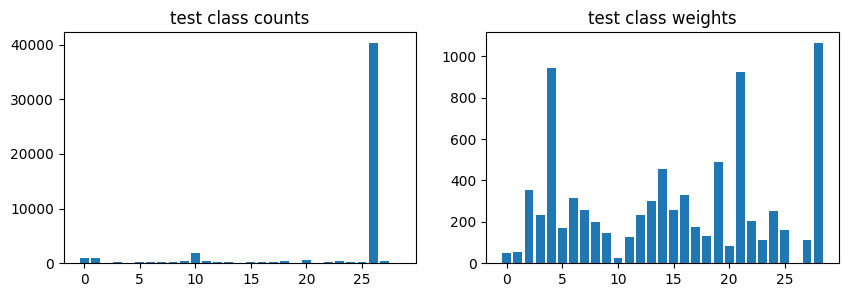

In [2]:
from legal_eval.utils import get_class_counts

for set_ in ["train", "test"]:
    class_counts = get_class_counts(dataset_casted[set_])
    fig, ax = plt.subplots(1,2, figsize=(10, 3))
    ax[0].bar(np.arange(29), class_counts)
    ax[0].set_title(f"{set_} class counts")
    ax[1].bar(np.arange(29), (class_counts / class_counts.sum())**(-1))
    ax[1].set_title(f"{set_} class weights")

Here we have our bug the labels between training and test set differs :) 

In [9]:
from legal_eval.baselines import TurboSimpleBaseline
from legal_eval.utils import print_predictions, evaluate_nerlegal

In [15]:
baseline1 = TurboSimpleBaseline()
baseline1.fit(dataset_ner['train'])

In [16]:
evaluate_nerlegal(dataset_ner['test'], baseline1)

Loading cached processed dataset at D:\hf_datasets\json\default-8e94a40253265d68\0.0.0\fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e\cache-4ec81a2a80d94162.arrow


,CASE_NUMBER,COURT,DATE,GPE,JUDGE,LAWYER,ORG,OTHER_PERSON,PETITIONER,PRECEDENT,...,RESPONDENT,STATUTE,WITNESS,overall_precision,overall_recall,overall_f1,overall_accuracy,total_time_in_seconds,samples_per_second,latency_in_seconds
precision,0.0,0.000483,0.005535,0.037037,0.093458,0.054054,0.003307,0.027755,0.0,0.0,...,0.004963,0.020853,0.007246,0.007369,0.057106,0.013053,0.441148,0.269113,3990.890069,0.000251
recall,0.0,0.003378,0.041860,0.019608,0.058824,0.023810,0.196203,0.129278,0.0,0.0,...,0.013029,0.215686,0.018519,0.007369,0.057106,0.013053,0.441148,0.269113,3990.890069,0.000251
f1,0.0,0.000845,0.009777,0.025641,0.072202,0.033058,0.006504,0.045699,0.0,0.0,...,0.007188,0.038029,0.010417,0.007369,0.057106,0.013053,0.441148,0.269113,3990.890069,0.000251
number,119.0,296.000000,215.000000,153.000000,170.000000,504.000000,158.000000,263.000000,206.0,177.0,...,307.000000,204.000000,54.000000,0.007369,0.057106,0.013053,0.441148,0.269113,3990.890069,0.000251


In [17]:
print_predictions(dataset_ner['test'][0], baseline1)

TOKEN	PREDICTION	TARGET
True,	O	O
our	O	O
Constitution	B-STATUTE	B-STATUTE
has	O	O
no	O	O
'due	O	O
process'	O	O
clause	B-PROVISION	O
or	I-PROVISION	O
the	I-ORG	O
VIII	I-PROVISION	O
Amendment;	O	O
but,	O	O
in	I-ORG	O
this	O	O
branch	O	O
of	I-ORG	O
law,	O	O
after	I-PROVISION	O
R.C.	B-JUDGE	B-PRECEDENT
Cooper	I-PETITIONER	I-PRECEDENT
v.	I-PRECEDENT	I-PRECEDENT
Union	B-ORG	I-PRECEDENT
of	I-ORG	I-PRECEDENT
India,	I-ORG	I-PRECEDENT
(1970)	I-PRECEDENT	I-PRECEDENT
1	B-DATE	I-PRECEDENT
SCC	I-PRECEDENT	I-PRECEDENT
248	I-PRECEDENT	I-PRECEDENT
and	I-ORG	O
Maneka	B-OTHER_PERSON	B-PRECEDENT
Gandhi	B-ORG	I-PRECEDENT
v.	I-PRECEDENT	I-PRECEDENT
Union	B-ORG	I-PRECEDENT
of	I-ORG	I-PRECEDENT
India,	I-ORG	I-PRECEDENT
(1978)	O	I-PRECEDENT
1	B-DATE	I-PRECEDENT
SCC	I-PRECEDENT	I-PRECEDENT
248,	O	I-PRECEDENT
the	I-ORG	O
consequence	O	O
is	O	O
the	I-ORG	O
same.	O	O


## ML baseline

In [18]:
from legal_eval.baselines import MLBaseline
import fasttext
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [23]:
MODEL_PATH = "../embeddings/legal_eval.bin"

model = fasttext.load_model(MODEL_PATH)
ml_baseline = MLBaseline(model, XGBClassifier(), window_size=1)
X, y = ml_baseline.prepare_dataset(dataset_casted['train'])

Map:   0%|          | 0/10995 [00:00<?, ? examples/s]

In [25]:
ml_baseline.fit(X, y, n_o_selected=10000)

In [6]:
evaluate_nerlegal(dataset_ner['test'], ml_baseline)

Loading cached processed dataset at D:\hf_datasets\json\default-a8e9242f0c3ba640\0.0.0\fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e\cache-d4f4ab5ea8677ed3.arrow


,CASE_NUMBER,COURT,DATE,GPE,JUDGE,LAWYER,ORG,OTHER_PERSON,PETITIONER,PRECEDENT,...,RESPONDENT,STATUTE,WITNESS,overall_precision,overall_recall,overall_f1,overall_accuracy,total_time_in_seconds,samples_per_second,latency_in_seconds
precision,0.007946,0.082445,0.203412,0.120482,0.061927,0.085917,0.048096,0.044304,0.011834,0.000574,...,0.012658,0.119360,0.027778,0.045007,0.26087,0.076769,0.639172,10.342615,103.842213,0.00963
recall,0.117647,0.496622,0.720930,0.130719,0.158824,0.192460,0.151899,0.079848,0.058252,0.011299,...,0.179153,0.401961,0.037037,0.045007,0.26087,0.076769,0.639172,10.342615,103.842213,0.00963
f1,0.014886,0.141414,0.317298,0.125392,0.089109,0.118800,0.073059,0.056988,0.019672,0.001092,...,0.023646,0.184063,0.031746,0.045007,0.26087,0.076769,0.639172,10.342615,103.842213,0.00963
number,119.000000,296.000000,215.000000,153.000000,170.000000,504.000000,158.000000,263.000000,206.000000,177.000000,...,307.000000,204.000000,54.000000,0.045007,0.26087,0.076769,0.639172,10.342615,103.842213,0.00963


In [26]:
print_predictions(dataset_ner['test'][0], ml_baseline)

TOKEN	PREDICTION	TARGET
True,	O	O
our	O	O
Constitution	B-PROVISION	B-STATUTE
has	O	O
no	O	O
'due	I-PROVISION	O
process'	I-PROVISION	O
clause	I-PROVISION	O
or	B-PROVISION	O
the	B-PROVISION	O
VIII	I-PROVISION	O
Amendment;	B-PROVISION	O
but,	I-PROVISION	O
in	O	O
this	O	O
branch	I-STATUTE	O
of	I-ORG	O
law,	B-PRECEDENT	O
after	I-PRECEDENT	O
R.C.	I-PRECEDENT	B-PRECEDENT
Cooper	I-PRECEDENT	I-PRECEDENT
v.	I-PRECEDENT	I-PRECEDENT
Union	I-PRECEDENT	I-PRECEDENT
of	I-PRECEDENT	I-PRECEDENT
India,	I-PRECEDENT	I-PRECEDENT
(1970)	I-PRECEDENT	I-PRECEDENT
1	I-PRECEDENT	I-PRECEDENT
SCC	I-PRECEDENT	I-PRECEDENT
248	I-PRECEDENT	I-PRECEDENT
and	I-PRECEDENT	O
Maneka	I-PRECEDENT	B-PRECEDENT
Gandhi	I-PRECEDENT	I-PRECEDENT
v.	I-PRECEDENT	I-PRECEDENT
Union	I-PRECEDENT	I-PRECEDENT
of	I-PRECEDENT	I-PRECEDENT
India,	I-PRECEDENT	I-PRECEDENT
(1978)	I-PRECEDENT	I-PRECEDENT
1	I-PRECEDENT	I-PRECEDENT
SCC	I-PRECEDENT	I-PRECEDENT
248,	O	I-PRECEDENT
the	I-PROVISION	O
consequence	I-CASE_NUMBER	O
is	I-CASE_NUMBER	O
the	O	O
sa

### DL baselines



In [4]:
from legal_eval.baselines import AttentionBaseline, AttentionBaselineConfig, AttentionCollator, LSTMBaseline, LSTMBaselineConfig, LSTMCollator
from legal_eval.baselines import prepare_dataset_staticemb
from transformers import Trainer, TrainingArguments
import fasttext
from legal_eval.utils import get_class_counts

In [5]:
class_counts = get_class_counts(dataset_casted["train"])
inverted_count = class_counts ** (-1)
WEIGHTS = list(inverted_count / inverted_count.sum())

In [31]:
MODEL_PATH = "../embeddings/legal_eval.bin"

model = fasttext.load_model(MODEL_PATH)
config = AttentionBaselineConfig(num_classes = 29, n_head=5, weights=WEIGHTS)
att_baseline = AttentionBaseline(config)

#config = LSTMBaselineConfig(num_classes=29, weights=WEIGHTS)
#lstm_baseline = LSTMBaseline(config)

In [21]:
dataset_train = prepare_dataset_staticemb(dataset_casted['train'], model)
dataset_test = prepare_dataset_staticemb(dataset_casted['test'], model)

Parameter 'fn_kwargs'={'embed_model': <fasttext.FastText._FastText object at 0x0000010A55C3B700>, 'split_len': 64} of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


Map:   0%|          | 0/10995 [00:00<?, ? examples/s]

Map:   0%|          | 0/1074 [00:00<?, ? examples/s]

In [35]:
training_args = TrainingArguments(
    output_dir="my_awesome_law_ner_model",
    learning_rate=1e-5,
    per_device_train_batch_size=48,
    per_device_eval_batch_size=48,
    num_train_epochs=10,
    evaluation_strategy="epoch",
    logging_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    report_to="wandb",
    remove_unused_columns=False,
)

In [36]:
trainer = Trainer(
    model=att_baseline,
    args=training_args,
    train_dataset=dataset_train,
    eval_dataset=dataset_test,
    data_collator=AttentionCollator(),
)

In [37]:
trainer.train()

  0%|          | 0/2800 [00:00<?, ?it/s]

{'loss': 3.0601, 'learning_rate': 9e-06, 'epoch': 1.0}


  0%|          | 0/28 [00:00<?, ?it/s]

{'eval_loss': 2.8468213081359863, 'eval_runtime': 3.1489, 'eval_samples_per_second': 415.7, 'eval_steps_per_second': 8.892, 'epoch': 1.0}


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 trainer.train()                                                                              │
│   2                                                                                              │
│                                                                                                  │
│ c:\Users\sebas\mambaforge\lib\site-packages\transformers\trainer.py:1664 in train                │
│                                                                                                  │
│   1661 │   │   inner_training_loop = find_executable_batch_size(                                 │
│   1662 │   │   │   self._inner_training_loop, self._train_batch_size, args.auto_find_batch_size  │
│   1663 │   │   )                                                                                 │
│ ❱ 1664 │   │   return inner_training_loop(                                                       │
│   1665 │   │   │   args=args,                                                                    │
│   1666 │   │   │   resume_from_checkpoint=resume_from_checkpoint,                                │
│   1667 │   │   │   trial=trial,                                                                  │
│                                                                                                  │
│ c:\Users\sebas\mambaforge\lib\site-packages\transformers\trainer.py:1945 in _inner_training_loop │
│                                                                                                  │
│   1942 │   │   │   │   if (                                                                      │
│   1943 │   │   │   │   │   args.logging_nan_inf_filter                                           │
│   1944 │   │   │   │   │   and not is_torch_tpu_available()                                      │
│ ❱ 1945 │   │   │   │   │   and (torch.isnan(tr_loss_step) or torch.isinf(tr_loss_step))          │
│   1946 │   │   │   │   ):                                                                        │
│   1947 │   │   │   │   │   # if loss is nan or inf simply add the average of previous logged lo  │
│   1948 │   │   │   │   │   tr_loss += tr_loss / (1 + self.state.global_step - self._globalstep_  │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyboardInterrupt

In [30]:
att_baseline.embed_model = model
att_baseline.class_labels = dataset_casted['train'].features["ner_tags"].feature
att_baseline.to("cuda")
evaluate_nerlegal(dataset_ner['test'], att_baseline)

Loading cached processed dataset at D:\hf_datasets\json\default-8e94a40253265d68\0.0.0\fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e\cache-4ec81a2a80d94162.arrow


,CASE_NUMBER,COURT,DATE,GPE,JUDGE,LAWYER,ORG,OTHER_PERSON,PETITIONER,PRECEDENT,...,RESPONDENT,STATUTE,WITNESS,overall_precision,overall_recall,overall_f1,overall_accuracy,total_time_in_seconds,samples_per_second,latency_in_seconds
precision,0.001596,0.004391,0.073991,0.015971,0.006810,0.015425,0.005296,0.079681,0.004132,0.0,...,0.006065,0.009215,0.003000,0.016854,0.155419,0.03041,0.412077,11.527233,93.170666,0.010733
recall,0.033613,0.054054,0.767442,0.084967,0.076471,0.128968,0.075949,0.152091,0.009709,0.0,...,0.052117,0.112745,0.055556,0.016854,0.155419,0.03041,0.412077,11.527233,93.170666,0.010733
f1,0.003046,0.008122,0.134969,0.026887,0.012506,0.027554,0.009901,0.104575,0.005797,0.0,...,0.010866,0.017037,0.005693,0.016854,0.155419,0.03041,0.412077,11.527233,93.170666,0.010733
number,119.000000,296.000000,215.000000,153.000000,170.000000,504.000000,158.000000,263.000000,206.000000,177.0,...,307.000000,204.000000,54.000000,0.016854,0.155419,0.03041,0.412077,11.527233,93.170666,0.010733


### Having this X calculate average cosine distances between entries of different classes. Compare this with HF embeddings.

In [71]:
distances = {}
for window_size in [1,3,7,11]:
    distances[window_size] = []
    ml_baseline = MLBaseline(model, XGBClassifier(), window_size=window_size)
    X, y = ml_baseline.prepare_dataset(dataset_ner['train'])
    X, y = ml_baseline.downsample_other(X, y, n_o_selected=10000)
    normalized_X = X / np.sqrt(np.sum(X**2, axis=1, keepdims=True))

    unique_labels = np.unique(y)
    for label in unique_labels:
        for other_label in unique_labels:
            if label == other_label:
                continue
            label_vectors = normalized_X[y == label]
            other_label_vectors = normalized_X[y == other_label]

            distances[window_size].append({
                "word": ml_baseline.class_labels.int2str(label.item())[:5],
                "other_word": ml_baseline.class_labels.int2str(other_label.item())[:5],
                "avg_similarity": (label_vectors @ other_label_vectors.T).mean()
            }) 

Loading cached processed dataset at D:\hf_datasets\json\default-5075b1c63c2a9678\0.0.0\fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e\cache-32a6a24dc7b08946.arrow


Map:   0%|          | 0/10995 [00:00<?, ? examples/s]

Loading cached processed dataset at D:\hf_datasets\json\default-5075b1c63c2a9678\0.0.0\fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e\cache-32a6a24dc7b08946.arrow


Map:   0%|          | 0/10995 [00:00<?, ? examples/s]

Loading cached processed dataset at D:\hf_datasets\json\default-5075b1c63c2a9678\0.0.0\fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e\cache-32a6a24dc7b08946.arrow


Map:   0%|          | 0/10995 [00:00<?, ? examples/s]

Loading cached processed dataset at D:\hf_datasets\json\default-5075b1c63c2a9678\0.0.0\fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e\cache-32a6a24dc7b08946.arrow


Map:   0%|          | 0/10995 [00:00<?, ? examples/s]

In [68]:
import pandas as pd
import plotly.express as px


In [73]:
for window_size in distances.keys():
    # Make other_word column a column index
    df = pd.DataFrame(distances[window_size])
    #df.set_index(["word"])
    df = pd.pivot_table(df, index=["word"], columns=["other_word"], fill_value=0).droplevel(0, axis=1)

    fig = px.imshow(df, title=f"Window size {window_size}")
    fig.write_html(f"average_window{window_size}.html")